In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import datetime
import random
import os
from tqdm.notebook import tqdm
tqdm.pandas()

from sklearn.model_selection import train_test_split

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# from transformers import  AutoTokenizer, AutoModel
# from transformers import AdamW
# from transformers import get_linear_schedule_with_warmup

C:\Users\Insight1\Anaconda3\envs\tf-gpu\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
os.chdir("I:")

import pandas as pd
data = pd.read_pickle('note_vec_token.pkl') 

In [ ]:
data['note_split'] = data['notes'].str.replace('\n', '').str.replace(r' +', ' ').str.split(' ') #replace \n with space or not
data['len_word'] = data['note_split'].apply(len)

data['token_id_matrix'].apply(lambda x: x.shape)

In [11]:
# X and y from noteclean_spacy_vec
df = pd.read_pickle('clean_note_spacy_vec.pkl')
df2 = pd.read_pickle('notes_clean.pkl')
df['len_clean'] = df2['len_clean']

filt = df[(df['len_clean']>=100) & (df['len_clean']<=2000) & (df['le_months']<= 250)] # filter data for ML

X = np.array(filt['noteclean_spacy_vec'].values.tolist())
y = filt['le_months'].to_numpy()

In [ ]:
dfnn = data[(data['le_months'] <= 250) & (data['len_word'] <= 2000)]
X = np.array(dfnn['note_spacy_vec'].tolist())
# y = dfnn['le_months'].astype(np.float32).to_numpy()
y = dfnn['le_months']

In [12]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=42)


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.models.Sequential()
# model.add(keras.layers.Dense(32, activation = 'relu', input_dim = 300))

model.add(keras.Input(shape=(300,)))
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer = 'normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer = 'normal'))
model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(512, activation='relu', kernel_initializer = 'normal'))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units = 1))
model.summary()

model.compile(optimizer= 'adam',loss = 'mean_squared_error')

checkpoint_filepath = '/log'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)
    
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10000, epochs=3000, callbacks=[model_checkpoint_callback])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               77056     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 110,081
Trainable params: 110,081
Non-trainable params: 0
_________________________________________________________________
Train on 36515 samples, validate on 5217 samples
Epoch 1/3000
36515/36515 [==============================] - 1s 24

36515/36515 [==============================] - 0s 12us/sample - loss: 1890.8266 - val_loss: 1644.8473
Epoch 63/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1878.3427 - val_loss: 1633.6599
Epoch 64/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1879.9007 - val_loss: 1623.0078
Epoch 65/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1864.5545 - val_loss: 1612.5889
Epoch 66/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1862.0415 - val_loss: 1600.8079
Epoch 67/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1845.0979 - val_loss: 1590.7101
Epoch 68/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1839.7373 - val_loss: 1581.5702
Epoch 69/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1812.6237 - val_loss: 1571.7301
Epoch 70/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 18

36515/36515 [==============================] - 0s 2us/sample - loss: 1573.2820 - val_loss: 1318.2465
Epoch 133/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1568.1712 - val_loss: 1315.3673
Epoch 134/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1551.8413 - val_loss: 1314.6555
Epoch 135/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1562.6879 - val_loss: 1311.7788
Epoch 136/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1558.1298 - val_loss: 1311.5175
Epoch 137/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1560.4351 - val_loss: 1310.3146
Epoch 138/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1551.6998 - val_loss: 1307.5364
Epoch 139/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1560.0252 - val_loss: 1306.5756
Epoch 140/3000
36515/36515 [==============================] - 0s 13us/sample - l

36515/36515 [==============================] - 0s 2us/sample - loss: 1497.8495 - val_loss: 1240.9424
Epoch 203/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1493.5877 - val_loss: 1238.7029
Epoch 204/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1486.0194 - val_loss: 1235.7902
Epoch 205/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1492.7198 - val_loss: 1238.5203
Epoch 206/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1484.6225 - val_loss: 1235.7201
Epoch 207/3000
36515/36515 [==============================] - 0s 9us/sample - loss: 1488.3226 - val_loss: 1234.3053
Epoch 208/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1504.1510 - val_loss: 1235.4767
Epoch 209/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1495.6668 - val_loss: 1234.7815
Epoch 210/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 

36515/36515 [==============================] - 0s 11us/sample - loss: 1446.1303 - val_loss: 1189.2625
Epoch 273/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1444.9435 - val_loss: 1188.4572
Epoch 274/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1448.6555 - val_loss: 1189.3137
Epoch 275/3000
36515/36515 [==============================] - 0s 9us/sample - loss: 1436.6282 - val_loss: 1186.2972
Epoch 276/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1450.7065 - val_loss: 1189.7769
Epoch 277/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1440.6704 - val_loss: 1188.1289
Epoch 278/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1436.2526 - val_loss: 1184.6090
Epoch 279/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1444.5261 - val_loss: 1187.7723
Epoch 280/3000
36515/36515 [==============================] - 0s 11us/sample - loss:

36515/36515 [==============================] - 0s 13us/sample - loss: 1423.0600 - val_loss: 1153.6057
Epoch 343/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1426.7406 - val_loss: 1156.9612
Epoch 344/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1409.2167 - val_loss: 1152.4821
Epoch 345/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1415.3970 - val_loss: 1156.0605
Epoch 346/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1420.2085 - val_loss: 1152.2844
Epoch 347/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1423.1182 - val_loss: 1153.7841
Epoch 348/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1415.6546 - val_loss: 1152.0142
Epoch 349/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1405.5231 - val_loss: 1156.1143
Epoch 350/3000
36515/36515 [==============================] - 0s 11us/sample - loss

36515/36515 [==============================] - 0s 10us/sample - loss: 1398.9989 - val_loss: 1124.8062
Epoch 413/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1393.0238 - val_loss: 1136.3916
Epoch 414/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1397.1021 - val_loss: 1124.6470
Epoch 415/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1395.5739 - val_loss: 1130.4360
Epoch 416/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1397.1673 - val_loss: 1129.0592
Epoch 417/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1394.2539 - val_loss: 1129.8062
Epoch 418/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1382.6807 - val_loss: 1126.8073
Epoch 419/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1385.1818 - val_loss: 1130.2488
Epoch 420/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1

36515/36515 [==============================] - 0s 1us/sample - loss: 1371.9585 - val_loss: 1111.4417
Epoch 483/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1365.5717 - val_loss: 1109.9219
Epoch 484/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1376.0978 - val_loss: 1111.2224
Epoch 485/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1383.9932 - val_loss: 1110.8453
Epoch 486/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1377.0091 - val_loss: 1109.0707
Epoch 487/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1377.9141 - val_loss: 1113.0203
Epoch 488/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1383.2158 - val_loss: 1111.2792
Epoch 489/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1375.0938 - val_loss: 1106.8784
Epoch 490/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 13

36515/36515 [==============================] - 0s 1us/sample - loss: 1363.0699 - val_loss: 1094.7906
Epoch 553/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1362.1807 - val_loss: 1105.4573
Epoch 554/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1362.4036 - val_loss: 1092.3264
Epoch 555/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1353.3801 - val_loss: 1091.3318
Epoch 556/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1364.0066 - val_loss: 1103.9329
Epoch 557/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1347.4349 - val_loss: 1095.2935
Epoch 558/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1357.0047 - val_loss: 1091.6172
Epoch 559/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1362.3315 - val_loss: 1113.6826
Epoch 560/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1

36515/36515 [==============================] - 0s 11us/sample - loss: 1338.2772 - val_loss: 1082.2057
Epoch 623/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1349.6179 - val_loss: 1095.8223
Epoch 624/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1345.9691 - val_loss: 1083.9128
Epoch 625/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1343.1671 - val_loss: 1084.1290
Epoch 626/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1346.5744 - val_loss: 1089.6176
Epoch 627/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1343.4983 - val_loss: 1081.4105
Epoch 628/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1336.2463 - val_loss: 1090.9976
Epoch 629/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1341.0883 - val_loss: 1084.5400
Epoch 630/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1

36515/36515 [==============================] - 0s 1us/sample - loss: 1328.4944 - val_loss: 1073.2236
Epoch 693/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1332.3832 - val_loss: 1077.7834
Epoch 694/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1333.6570 - val_loss: 1081.4890
Epoch 695/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1338.0392 - val_loss: 1081.8210
Epoch 696/3000
36515/36515 [==============================] - 0s 13us/sample - loss: 1327.0357 - val_loss: 1072.9329
Epoch 697/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1339.4971 - val_loss: 1083.3593
Epoch 698/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1331.2627 - val_loss: 1078.3915
Epoch 699/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1323.2609 - val_loss: 1072.8945
Epoch 700/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1

36515/36515 [==============================] - 0s 1us/sample - loss: 1319.3762 - val_loss: 1066.9569
Epoch 763/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1326.0303 - val_loss: 1065.8517
Epoch 764/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1331.9071 - val_loss: 1079.9020
Epoch 765/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1324.4194 - val_loss: 1073.5432
Epoch 766/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1318.6622 - val_loss: 1066.6635
Epoch 767/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1320.8816 - val_loss: 1080.0380
Epoch 768/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1323.2247 - val_loss: 1076.5338
Epoch 769/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1327.4815 - val_loss: 1063.9858
Epoch 770/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 13

36515/36515 [==============================] - 0s 1us/sample - loss: 1309.3515 - val_loss: 1068.2948
Epoch 833/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1308.0916 - val_loss: 1060.0447
Epoch 834/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1324.3303 - val_loss: 1064.5004
Epoch 835/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1307.1502 - val_loss: 1070.4237
Epoch 836/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1303.7939 - val_loss: 1060.9337
Epoch 837/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1312.2695 - val_loss: 1061.7361
Epoch 838/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1311.0016 - val_loss: 1068.5593
Epoch 839/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1319.8930 - val_loss: 1062.5240
Epoch 840/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 130

36515/36515 [==============================] - 0s 1us/sample - loss: 1296.0573 - val_loss: 1060.8766
Epoch 903/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1310.2255 - val_loss: 1060.1222
Epoch 904/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1300.8083 - val_loss: 1056.7795
Epoch 905/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1294.5890 - val_loss: 1061.0172
Epoch 906/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1311.2233 - val_loss: 1066.9105
Epoch 907/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1297.3537 - val_loss: 1057.3562
Epoch 908/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1301.7178 - val_loss: 1056.7426
Epoch 909/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1291.9087 - val_loss: 1064.2861
Epoch 910/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 129

36515/36515 [==============================] - 0s 1us/sample - loss: 1286.7370 - val_loss: 1060.9094
Epoch 973/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1297.0407 - val_loss: 1052.4619
Epoch 974/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1295.3887 - val_loss: 1057.7281
Epoch 975/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1288.4547 - val_loss: 1052.9846
Epoch 976/3000
36515/36515 [==============================] - 0s 9us/sample - loss: 1298.0105 - val_loss: 1050.7090
Epoch 977/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1300.8754 - val_loss: 1062.4427
Epoch 978/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1294.1838 - val_loss: 1059.7764
Epoch 979/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1293.2940 - val_loss: 1052.4708
Epoch 980/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 130

36515/36515 [==============================] - 0s 1us/sample - loss: 1281.6406 - val_loss: 1046.9873
Epoch 1043/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1280.4680 - val_loss: 1052.0376
Epoch 1044/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1293.9270 - val_loss: 1055.2637
Epoch 1045/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1282.6425 - val_loss: 1051.7919
Epoch 1046/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1282.6399 - val_loss: 1045.8186
Epoch 1047/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1281.4605 - val_loss: 1056.0085
Epoch 1048/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1288.4502 - val_loss: 1057.8459
Epoch 1049/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1290.8047 - val_loss: 1046.0708
Epoch 1050/3000
36515/36515 [==============================] - 0s 1us/sample - l

36515/36515 [==============================] - 0s 1us/sample - loss: 1272.0871 - val_loss: 1046.1523
Epoch 1113/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1276.6201 - val_loss: 1042.2223
Epoch 1114/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1286.4329 - val_loss: 1047.8370
Epoch 1115/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1270.1646 - val_loss: 1045.8690
Epoch 1116/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1273.8102 - val_loss: 1040.4130
Epoch 1117/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1288.4682 - val_loss: 1045.3184
Epoch 1118/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1271.0861 - val_loss: 1044.6229
Epoch 1119/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1259.5319 - val_loss: 1050.1880
Epoch 1120/3000
36515/36515 [==============================] - 0s 1us/sample - 

36515/36515 [==============================] - 0s 1us/sample - loss: 1257.6619 - val_loss: 1041.2273
Epoch 1183/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1280.4579 - val_loss: 1050.3945
Epoch 1184/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1264.1381 - val_loss: 1034.1903
Epoch 1185/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1261.4272 - val_loss: 1035.0306
Epoch 1186/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1273.4924 - val_loss: 1039.6982
Epoch 1187/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1259.7106 - val_loss: 1038.2670
Epoch 1188/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1263.9283 - val_loss: 1034.3407
Epoch 1189/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1264.4123 - val_loss: 1038.1475
Epoch 1190/3000
36515/36515 [==============================] - 0s 1us/sample - 

36515/36515 [==============================] - 0s 1us/sample - loss: 1258.9644 - val_loss: 1037.4275
Epoch 1253/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1240.1728 - val_loss: 1026.5116
Epoch 1254/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1261.0423 - val_loss: 1027.3278
Epoch 1255/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1251.1973 - val_loss: 1038.7451
Epoch 1256/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1251.1215 - val_loss: 1027.5142
Epoch 1257/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1246.4259 - val_loss: 1025.5244
Epoch 1258/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1250.2731 - val_loss: 1038.6594
Epoch 1259/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1260.8186 - val_loss: 1036.4552
Epoch 1260/3000
36515/36515 [==============================] - 0s 1us/sample -

36515/36515 [==============================] - 0s 1us/sample - loss: 1238.7688 - val_loss: 1021.0992
Epoch 1323/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1236.0220 - val_loss: 1029.7638
Epoch 1324/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1249.8461 - val_loss: 1020.7827
Epoch 1325/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1237.1024 - val_loss: 1021.1343
Epoch 1326/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1233.0833 - val_loss: 1028.2029
Epoch 1327/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1241.7572 - val_loss: 1023.5639
Epoch 1328/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1238.3327 - val_loss: 1021.6950
Epoch 1329/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1241.9517 - val_loss: 1021.7720
Epoch 1330/3000
36515/36515 [==============================] - 0s 1us/sample - l

36515/36515 [==============================] - 0s 1us/sample - loss: 1220.1937 - val_loss: 1014.3588
Epoch 1393/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1226.3635 - val_loss: 1011.5511
Epoch 1394/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1233.1483 - val_loss: 1017.0897
Epoch 1395/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1223.3252 - val_loss: 1016.3478
Epoch 1396/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1213.2616 - val_loss: 1016.7113
Epoch 1397/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1229.5580 - val_loss: 1010.1320
Epoch 1398/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1226.3624 - val_loss: 1013.8740
Epoch 1399/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1227.8063 - val_loss: 1023.2492
Epoch 1400/3000
36515/36515 [==============================] - 0s 1us/sample - 

36515/36515 [==============================] - 0s 1us/sample - loss: 1205.0464 - val_loss: 1012.7104
Epoch 1463/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1212.5672 - val_loss: 1010.0008
Epoch 1464/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1210.7447 - val_loss: 1001.7233
Epoch 1465/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1206.6864 - val_loss: 1006.7272
Epoch 1466/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1209.5517 - val_loss: 1008.4823
Epoch 1467/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1214.6339 - val_loss: 1008.6832
Epoch 1468/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1216.2756 - val_loss: 1002.4689
Epoch 1469/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1220.6821 - val_loss: 1002.1334
Epoch 1470/3000
36515/36515 [==============================] - 0s 1us/sample - 

36515/36515 [==============================] - 0s 1us/sample - loss: 1201.1857 - val_loss: 1002.0913
Epoch 1533/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1201.8771 - val_loss: 1006.9622
Epoch 1534/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1203.8527 - val_loss: 1000.9551
Epoch 1535/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1195.2930 - val_loss: 996.4079
Epoch 1536/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1203.5740 - val_loss: 994.6269
Epoch 1537/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1200.1752 - val_loss: 1001.4617
Epoch 1538/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1199.1968 - val_loss: 1000.0950
Epoch 1539/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1193.9432 - val_loss: 995.2599
Epoch 1540/3000
36515/36515 [==============================] - 0s 1us/sample - loss

36515/36515 [==============================] - 0s 1us/sample - loss: 1192.4143 - val_loss: 991.9954
Epoch 1603/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1178.1212 - val_loss: 995.0677
Epoch 1604/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1186.8757 - val_loss: 992.2853
Epoch 1605/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1188.7257 - val_loss: 991.8585
Epoch 1606/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1198.9188 - val_loss: 995.1383
Epoch 1607/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1186.6056 - val_loss: 988.4604
Epoch 1608/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1185.8686 - val_loss: 996.8705
Epoch 1609/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1184.0641 - val_loss: 988.7817
Epoch 1610/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 118

36515/36515 [==============================] - 0s 1us/sample - loss: 1185.8321 - val_loss: 984.2762
Epoch 1673/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1167.8885 - val_loss: 981.6682
Epoch 1674/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1180.4616 - val_loss: 991.2917
Epoch 1675/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1169.0895 - val_loss: 980.9355
Epoch 1676/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1175.4671 - val_loss: 985.0367
Epoch 1677/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1164.2407 - val_loss: 981.3224
Epoch 1678/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1174.1979 - val_loss: 982.9187
Epoch 1679/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1176.2054 - val_loss: 985.0615
Epoch 1680/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 11

36515/36515 [==============================] - 0s 1us/sample - loss: 1164.3911 - val_loss: 978.4830
Epoch 1743/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1158.1617 - val_loss: 972.6218
Epoch 1744/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1166.7413 - val_loss: 976.5708
Epoch 1745/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1163.7251 - val_loss: 977.2852
Epoch 1746/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1164.4592 - val_loss: 979.0891
Epoch 1747/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1168.8005 - val_loss: 975.4838
Epoch 1748/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1158.3190 - val_loss: 973.1988
Epoch 1749/3000
36515/36515 [==============================] - 0s 10us/sample - loss: 1158.1100 - val_loss: 972.5644
Epoch 1750/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1

36515/36515 [==============================] - 0s 1us/sample - loss: 1148.3827 - val_loss: 970.6832
Epoch 1813/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1148.6979 - val_loss: 966.9124
Epoch 1814/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1153.0865 - val_loss: 976.1802
Epoch 1815/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1148.8369 - val_loss: 969.5184
Epoch 1816/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1149.7616 - val_loss: 965.2197
Epoch 1817/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1143.7018 - val_loss: 968.9622
Epoch 1818/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1138.1954 - val_loss: 972.6318
Epoch 1819/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1154.1630 - val_loss: 966.4882
Epoch 1820/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 114

36515/36515 [==============================] - 0s 1us/sample - loss: 1147.4569 - val_loss: 960.1765
Epoch 1883/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1128.7222 - val_loss: 958.0666
Epoch 1884/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1143.1515 - val_loss: 960.7252
Epoch 1885/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1146.0367 - val_loss: 959.0386
Epoch 1886/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1151.4328 - val_loss: 965.2561
Epoch 1887/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1132.1231 - val_loss: 957.1418
Epoch 1888/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1135.5549 - val_loss: 962.0704
Epoch 1889/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1140.2398 - val_loss: 957.8376
Epoch 1890/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 112

36515/36515 [==============================] - 0s 1us/sample - loss: 1126.0130 - val_loss: 952.2532
Epoch 1953/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1122.9427 - val_loss: 956.5836
Epoch 1954/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1130.9820 - val_loss: 953.0469
Epoch 1955/3000
36515/36515 [==============================] - 0s 12us/sample - loss: 1126.9945 - val_loss: 951.4970
Epoch 1956/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1128.9981 - val_loss: 956.8152
Epoch 1957/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1125.1684 - val_loss: 952.3217
Epoch 1958/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1132.2183 - val_loss: 955.8436
Epoch 1959/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1128.8056 - val_loss: 952.7079
Epoch 1960/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 11

36515/36515 [==============================] - 0s 1us/sample - loss: 1101.8921 - val_loss: 949.3289
Epoch 2023/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1122.8527 - val_loss: 952.9674
Epoch 2024/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1117.7113 - val_loss: 947.2668
Epoch 2025/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1123.0730 - val_loss: 946.2800
Epoch 2026/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1102.9861 - val_loss: 946.6067
Epoch 2027/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1115.1923 - val_loss: 947.4716
Epoch 2028/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1105.8708 - val_loss: 950.7118
Epoch 2029/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1116.8332 - val_loss: 949.3012
Epoch 2030/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 112

36515/36515 [==============================] - 0s 1us/sample - loss: 1101.4452 - val_loss: 947.1983
Epoch 2093/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1115.6471 - val_loss: 939.4139
Epoch 2094/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1104.8723 - val_loss: 945.3082
Epoch 2095/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1107.8249 - val_loss: 940.2990
Epoch 2096/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1102.9488 - val_loss: 950.3130
Epoch 2097/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1105.7184 - val_loss: 943.4479
Epoch 2098/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1108.7976 - val_loss: 943.6237
Epoch 2099/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1097.7790 - val_loss: 939.1635
Epoch 2100/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1

36515/36515 [==============================] - 0s 1us/sample - loss: 1086.2110 - val_loss: 942.6066
Epoch 2163/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1095.9054 - val_loss: 935.1027
Epoch 2164/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1104.0216 - val_loss: 939.5984
Epoch 2165/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1097.9925 - val_loss: 935.5396
Epoch 2166/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1094.9042 - val_loss: 937.8084
Epoch 2167/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1090.2668 - val_loss: 934.7437
Epoch 2168/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1099.2083 - val_loss: 939.4937
Epoch 2169/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1095.4353 - val_loss: 933.5039
Epoch 2170/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 10

36515/36515 [==============================] - 0s 1us/sample - loss: 1084.0246 - val_loss: 936.0510
Epoch 2233/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1082.2433 - val_loss: 931.4020
Epoch 2234/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1074.2342 - val_loss: 930.0534
Epoch 2235/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1087.1860 - val_loss: 933.3684
Epoch 2236/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1080.1259 - val_loss: 935.0353
Epoch 2237/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1085.3711 - val_loss: 935.6837
Epoch 2238/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1089.3909 - val_loss: 933.3600
Epoch 2239/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1080.0101 - val_loss: 933.1743
Epoch 2240/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 107

36515/36515 [==============================] - 0s 1us/sample - loss: 1069.2602 - val_loss: 929.0534
Epoch 2303/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1077.1757 - val_loss: 927.9072
Epoch 2304/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1066.8205 - val_loss: 927.0412
Epoch 2305/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1070.2946 - val_loss: 926.1985
Epoch 2306/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1078.8218 - val_loss: 928.1042
Epoch 2307/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1069.9457 - val_loss: 930.7476
Epoch 2308/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1068.7146 - val_loss: 925.7304
Epoch 2309/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 1069.5102 - val_loss: 927.2288
Epoch 2310/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1

36515/36515 [==============================] - 0s 1us/sample - loss: 1072.6805 - val_loss: 922.9679
Epoch 2373/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1070.8280 - val_loss: 928.9695
Epoch 2374/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1070.9498 - val_loss: 922.6970
Epoch 2375/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1066.9649 - val_loss: 926.5166
Epoch 2376/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1069.9404 - val_loss: 921.9952
Epoch 2377/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1065.4836 - val_loss: 926.2481
Epoch 2378/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1057.4897 - val_loss: 922.3113
Epoch 2379/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1065.0023 - val_loss: 928.1332
Epoch 2380/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 106

36515/36515 [==============================] - 0s 1us/sample - loss: 1058.0685 - val_loss: 928.1447
Epoch 2443/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 1053.5347 - val_loss: 918.7983
Epoch 2444/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1056.6564 - val_loss: 927.1600
Epoch 2445/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1055.3896 - val_loss: 922.3761
Epoch 2446/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1057.1074 - val_loss: 921.0976
Epoch 2447/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1052.2293 - val_loss: 920.8763
Epoch 2448/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1049.9111 - val_loss: 921.5368
Epoch 2449/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1037.7566 - val_loss: 919.4240
Epoch 2450/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 10

36515/36515 [==============================] - 0s 1us/sample - loss: 1034.9132 - val_loss: 917.0560
Epoch 2513/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1045.9428 - val_loss: 920.0831
Epoch 2514/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1038.5964 - val_loss: 914.9709
Epoch 2515/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1042.8412 - val_loss: 920.4609
Epoch 2516/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1044.3776 - val_loss: 914.2217
Epoch 2517/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1042.9280 - val_loss: 916.4135
Epoch 2518/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1042.6859 - val_loss: 916.4615
Epoch 2519/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1039.8186 - val_loss: 915.1153
Epoch 2520/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 104

36515/36515 [==============================] - 0s 1us/sample - loss: 1032.3099 - val_loss: 919.2855
Epoch 2583/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1031.2845 - val_loss: 912.9363
Epoch 2584/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1040.2269 - val_loss: 918.7296
Epoch 2585/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1031.2875 - val_loss: 913.2789
Epoch 2586/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1026.9354 - val_loss: 915.2165
Epoch 2587/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1039.4702 - val_loss: 914.4311
Epoch 2588/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1024.4678 - val_loss: 916.3143
Epoch 2589/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1027.1796 - val_loss: 914.8347
Epoch 2590/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 10

36515/36515 [==============================] - 0s 1us/sample - loss: 1027.7644 - val_loss: 908.5894
Epoch 2653/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1024.6018 - val_loss: 911.8733
Epoch 2654/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1028.3131 - val_loss: 911.4111
Epoch 2655/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1024.8263 - val_loss: 913.6261
Epoch 2656/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1035.9251 - val_loss: 909.3958
Epoch 2657/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1020.2361 - val_loss: 911.5240
Epoch 2658/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1018.6648 - val_loss: 910.7383
Epoch 2659/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1018.9529 - val_loss: 911.4494
Epoch 2660/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 102

36515/36515 [==============================] - 0s 1us/sample - loss: 1017.1548 - val_loss: 906.6740
Epoch 2723/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1012.1515 - val_loss: 905.6161
Epoch 2724/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1020.3373 - val_loss: 908.2401
Epoch 2725/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1009.9424 - val_loss: 908.7805
Epoch 2726/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1021.6030 - val_loss: 910.7783
Epoch 2727/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1016.3861 - val_loss: 905.7133
Epoch 2728/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1016.9742 - val_loss: 908.5674
Epoch 2729/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1017.5365 - val_loss: 909.7370
Epoch 2730/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 100

Epoch 2793/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 998.3036 - val_loss: 906.5278
Epoch 2794/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1003.3788 - val_loss: 907.4447
Epoch 2795/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1017.5054 - val_loss: 905.5933
Epoch 2796/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1002.7396 - val_loss: 905.5454
Epoch 2797/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1001.4817 - val_loss: 906.7516
Epoch 2798/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1003.6100 - val_loss: 905.9419
Epoch 2799/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1013.6150 - val_loss: 903.0598
Epoch 2800/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1002.9322 - val_loss: 907.3558
Epoch 2801/3000
36515/36515 [==============================] - 0s 1us/sam

36515/36515 [==============================] - 0s 1us/sample - loss: 988.9398 - val_loss: 907.5684
Epoch 2864/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 995.8498 - val_loss: 902.1845
Epoch 2865/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1008.1792 - val_loss: 905.9127
Epoch 2866/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 999.9061 - val_loss: 904.1252
Epoch 2867/3000
36515/36515 [==============================] - 0s 13us/sample - loss: 994.4423 - val_loss: 898.4020
Epoch 2868/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1005.7751 - val_loss: 910.5919
Epoch 2869/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1004.2402 - val_loss: 902.7388
Epoch 2870/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 1007.0063 - val_loss: 909.3511
Epoch 2871/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 998.98

36515/36515 [==============================] - 0s 1us/sample - loss: 997.8133 - val_loss: 904.0439
Epoch 2935/3000
36515/36515 [==============================] - 0s 11us/sample - loss: 978.1758 - val_loss: 898.2862
Epoch 2936/3000
36515/36515 [==============================] - 0s 2us/sample - loss: 982.9285 - val_loss: 903.9849
Epoch 2937/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 985.9441 - val_loss: 900.3877
Epoch 2938/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 990.9548 - val_loss: 899.5269
Epoch 2939/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 997.8582 - val_loss: 899.8051
Epoch 2940/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 989.4124 - val_loss: 900.7168
Epoch 2941/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 987.4385 - val_loss: 904.3959
Epoch 2942/3000
36515/36515 [==============================] - 0s 1us/sample - loss: 989.8052 -

In [ ]:
print(model_log.history.keys())

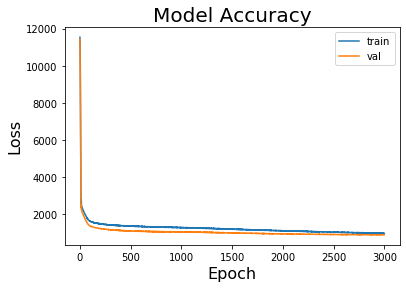

In [35]:
plt.plot(history.history['loss'][:3000])
plt.plot(history.history['val_loss'][:3000])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [36]:
model.load_weights(checkpoint_filepath)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred= model.predict(X_test)

from sklearn.metrics import mean_absolute_error
abs_er = mean_absolute_error(y_test, y_test_pred)
print(abs_er)

from sklearn.metrics import r2_score
rsq_train = r2_score(y_train, y_train_pred)
rsq_val = r2_score(y_val, y_val_pred)
rsq_test = r2_score(y_test, y_test_pred)

print(rsq_train, rsq_val, rsq_test)
# 100 epoches: abs_er= 19.991914022416207; rsq =0.6311475230416835; rsq_train = 0.9392278263642062 
# 20.781554059329675
# 0.6444936458044239 0.5632780303898981 0.5536371000303386

#3000 epoch (512/256/512) abs=23.203737412144314  r2 = 0.768495009799099  0.5852656900697112 0.5530109538595611
#3000 epoch (512/0.3,256/0.3, 512)abs=20.688904906315482 r2 =0.9325278290184188 0.6484640725710789 0.6103992408162731

23.497373332322866
0.6610306253961309 0.5823663144592786 0.552474902527388


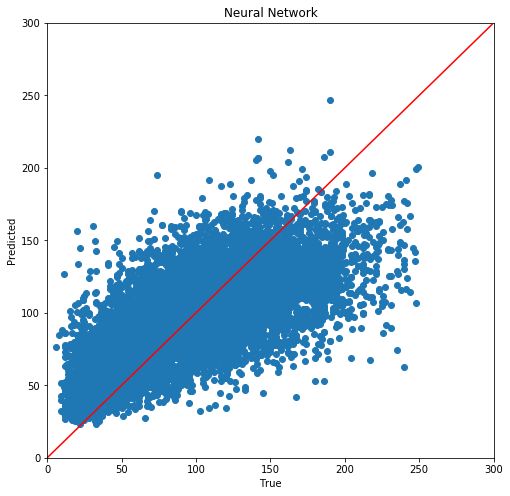

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred)
plt.plot(range(300), range(300), '-r')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.title("Neural Network")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
dfnn['le_halfyear'] = dfnn['le_months'].apply(lambda x: round(x/6))

dfnn['le_halfyear'].value_counts().sort_index()

X = np.array(dfnn['note_spacy_vec'].tolist())
label = dfnn['le_halfyear']

X_trainval, X_test, label_trainval, label_test = train_test_split(X, label, test_size=0.2, random_state=42)
X_train, X_val, label_train, label_val = train_test_split(X_trainval, label_trainval, test_size=0.125, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.models.Sequential()
# model.add(keras.layers.Dense(32, activation = 'relu', input_dim = 300))

model.add(keras.Input(shape=(300,)))
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer = 'normal'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer = 'normal'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer = 'normal'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(43, activation='softmax'))
model.summary()

model.compile(optimizer= 'adam',loss = 'sparse_categorical_crossentropy')

checkpoint_filepath = '/log'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

# The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)
    
model_log = model.fit(X_train, label_train, validation_data=(X_val, label_val), batch_size=10000, epochs=10000, callbacks=[model_checkpoint_callback])

In [ ]:
plt.plot(model_log.history['acc'][:1000])
plt.plot(model_log.history['val_acc'][:1000])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# model.load_weights(checkpoint_filepath)

label_train_pred = np.argmax(model.predict(X_train),1)
label_val_pred = np.argmax(model.predict(X_val),1)
label_test_pred= np.argmax(model.predict(X_test),1)

from sklearn.metrics import accuracy_score
rsq_train = accuracy_score(label_train, label_train_pred)
rsq_val = accuracy_score(label_val, label_val_pred)
rsq_test = accuracy_score(label_test, label_test_pred)

print(rsq_train, rsq_val, rsq_test)
# 0.7535449361659181 0.2555634051571883 0.25633554083885207
